In [1]:
# Importing required libraraies

import cv2
import numpy as np
from matplotlib import pyplot as plt

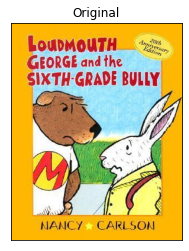

In [4]:
img=cv2.imread("book.jpg")
plt.imshow(img)

# Plot the image

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.xticks([])
plt.yticks([])
plt.show()

# noise reduction

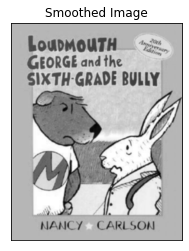

In [5]:
# Convert to graycsale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Guassian blur to smooth the image
img_smooth = cv2.GaussianBlur(img_gray, (3, 3), sigmaX = 0, sigmaY = 0) 

# Plot the image

plt.imshow(img_smooth, cmap='gray')
plt.title('Smoothed Image')
plt.xticks([])
plt.yticks([])
plt.show()

# sobel filter

In [6]:
# Sobel Edge Detection
img_sobelx = cv2.Sobel(img_smooth, cv2.CV_32F, 1, 0, ksize = 3)   # CV_32F: 32 bits floats
img_sobelx = np.clip(img_sobelx, 0, 255)

img_sobely = cv2.Sobel(img_smooth, cv2.CV_32F, 0, 1, ksize = 3)
img_sobely = np.clip(img_sobely, 0, 255)

img_sobel = cv2.magnitude(img_sobelx, img_sobely)
img_sobel = np.clip(img_sobel, 0, 255)

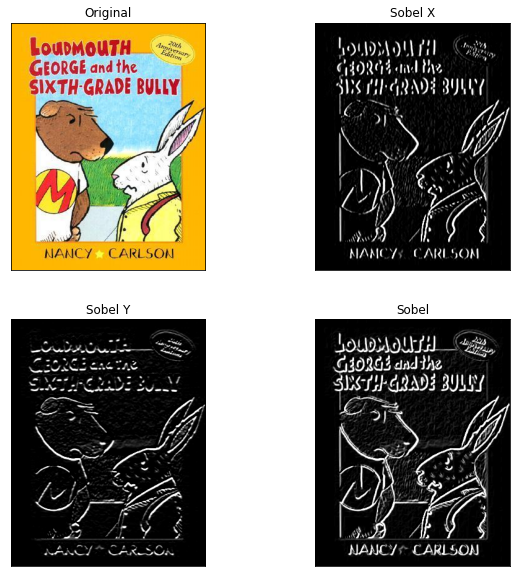

In [8]:
# Display Sobel Edge Detection Images

plt.figure(figsize=(10, 10))

plt.subplot(221)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.xticks([])
plt.yticks([])

plt.subplot(222)
plt.imshow(img_sobelx, cmap=plt.get_cmap('gray'))
plt.title('Sobel X')
plt.xticks([])
plt.yticks([])

plt.subplot(223)
plt.imshow(img_sobely, cmap=plt.get_cmap('gray'))
plt.title('Sobel Y')
plt.xticks([])
plt.yticks([])

plt.subplot(224)
plt.imshow(img_sobel, cmap=plt.get_cmap('gray'))
plt.title('Sobel')
plt.xticks([])
plt.yticks([])
plt.savefig('sobel results.png', bbox_inches='tight')
plt.show()

# prewitt filter

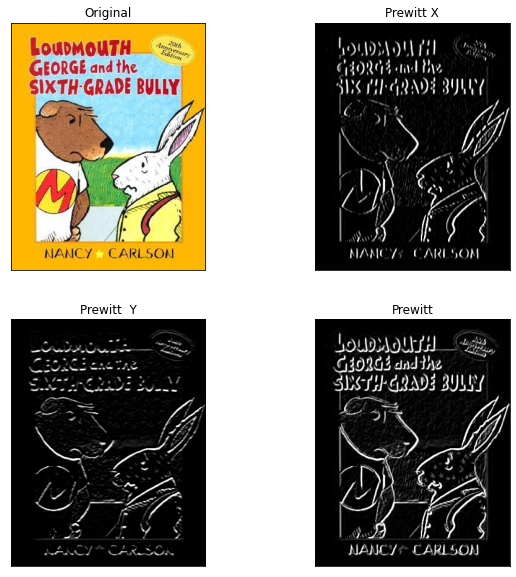

In [10]:
#prewitt
kernelx = np.array([[-1, 0, 1],
                    [-1, 0, 1],
                    [-1, 0, 1]])

kernely = np.array([[-1, -1, -1],
                    [0, 0, 0],
                    [1, 1, 1]])

img_prewittx = cv2.filter2D(img_smooth, cv2.CV_32F, kernelx)
img_prewittx = np.clip(img_prewittx, 0, 255)

img_prewitty = cv2.filter2D(img_smooth, cv2.CV_32F, kernely)
img_prewitty = np.clip(img_prewitty, 0, 255)


img_prewitt = cv2.magnitude(img_prewittx, img_prewitty)
img_prewitt = np.clip(img_prewitt, 0, 255)

# Display prewitt Edge Detection Images
plt.figure(figsize=(10, 10))
plt.subplot(221)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.xticks([])
plt.yticks([])


plt.subplot(222)
plt.imshow(img_prewittx, cmap=plt.get_cmap('gray'))
plt.title('Prewitt X')
plt.xticks([])
plt.yticks([])

plt.subplot(223)
plt.imshow(img_prewitty, cmap=plt.get_cmap('gray'))
plt.title('Prewitt  Y')
plt.xticks([])
plt.yticks([])

plt.subplot(224)
plt.imshow(img_prewitt, cmap=plt.get_cmap('gray'))
plt.title('Prewitt')
plt.xticks([])
plt.yticks([])
plt.savefig('prewitt_filter.png', bbox_inches='tight')
plt.show()

# laplacian filter

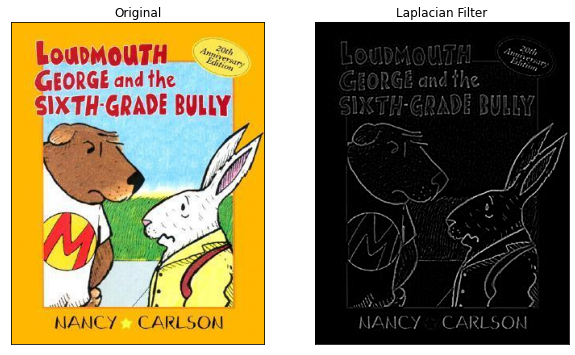

In [12]:
#laplacian
laplacian_kernel = np.array([[0, 1, 0], 
                             [1, -4, 1],
                             [0, 1, 0]])

laplacian_result = cv2.filter2D(img_smooth, -1, laplacian_kernel)
laplacian_result = np.clip(laplacian_result, 0, 255)


# Display Laplacian Edge Detection Images
plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.xticks([])
plt.yticks([])


plt.subplot(122)
plt.imshow(laplacian_result, cmap=plt.get_cmap('gray'))
plt.title('Laplacian Filter')
plt.xticks([])
plt.yticks([])
plt.savefig('laplacian_filter.png', bbox_inches='tight')
plt.show()

### built-in laplacian filter

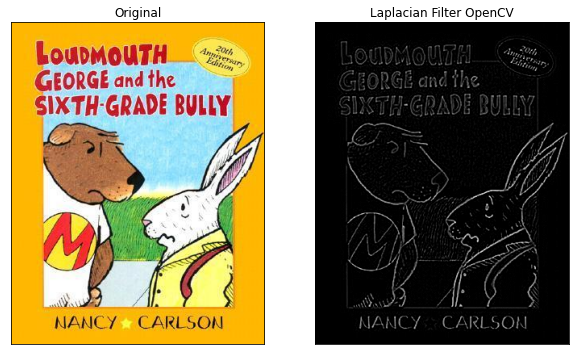

In [14]:
# Using cv2 built-in function
laplacian = cv2.Laplacian(img_smooth, -1) 

# Display Laplacian Edge Detection Image
plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.xticks([])
plt.yticks([])


plt.subplot(122)
plt.imshow(laplacian_result, cmap=plt.get_cmap('gray'))
plt.title('Laplacian Filter OpenCV')
plt.xticks([])
plt.yticks([])
plt.savefig('laplacian_filter_OpenCV.png', bbox_inches='tight')
plt.show()

# Canny Edge Detector

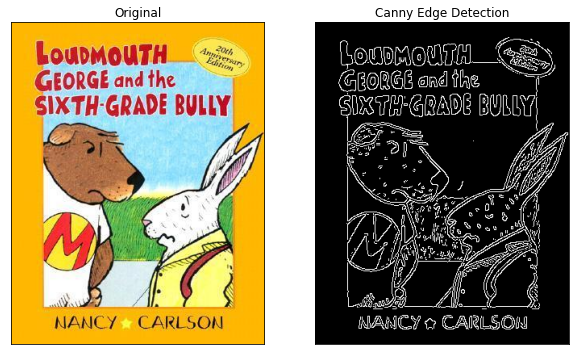

In [17]:
# Canny Edge Detection
edges = cv2.Canny(image = img_smooth, threshold1 = 70, threshold2 = 90)



# Display Canny Edge Detection Image
plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.xticks([])
plt.yticks([])


plt.subplot(122)
plt.imshow(edges, cmap=plt.get_cmap('gray'))
plt.title('Canny Edge Detection')
plt.xticks([])
plt.yticks([])
plt.savefig('canny.png', bbox_inches='tight')
plt.show()
